In [1]:
from keras.utils import np_utils
import numpy as np
np.random.seed(10)

Using TensorFlow backend.


In [2]:
from keras.datasets import mnist
(x_train_image,y_train_label),\
(x_test_image,y_test_label) = mnist.load_data()  # 讀取mnist 資料

In [3]:
x_Train=x_train_image.reshape(60000,784).astype('float32')# features reshape轉換
x_Test=x_test_image.reshape(10000,784).astype('float32')

x_Train_normalize = x_Train / 255 #像素255 / 255標準化
x_Test_normalize = x_Test / 255

In [4]:
y_Train_Onehot = np_utils.to_categorical(y_train_label) #label0～9個數字進行One-encondind轉換
y_Test_Onehot = np_utils.to_categorical(y_test_label)

In [5]:
from keras.models import Sequential#序列化
from keras.layers import Dense #感知器演算法
model = Sequential()#建立序列化模型
##建立輸入層與隱藏層
model.add(Dense(units=256,#隱藏層神經元256
               input_dim=784,#設定輸入層神經元784個(28*28的二維影像 reshape轉換為一維的向量也就是784float數字)
               kernel_initializer='normal',#使用normal disribution常態分佈的亂數 初始化weight(權重)bias(偏差量)
               activation = 'relu'))#定義激活函數為relu

In [6]:
###Dense implements the operation: output = activation 激活函數 (dot(input, kernel) + bias偏失量)
###where activation is the element-wise activation function passed as the activation argument, 
###kernel is a weights matrix（權重矩陣） created by the layer, 
###and bias is a bias vector created by the layer (only applicable if use_bias is True).



In [7]:
##建立輸出層
model.add(Dense(units=10,#定義輸出層神經元10個
                kernel_initializer='normal',#使用normal disribution常態分佈的亂數 初始化weight(權重)bias(偏差量)
                activation='softmax'))#定義激活函數為softmax

In [8]:
##查看模型摘要
print(model.summary())
###建立隱藏層與輸入層公式：
# h1=relu(X*W1+b1)  隱藏層的param=784(輸入層神經元)*256(隱藏層神經元)+256
###建立隱藏層與輸出層公式
#h2=softmax(h1*W2+b2)  輸出層的param=256(隱藏層神經元)*10(輸出層神經元)+10
###Trainable params是每一層param加總

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________
None


In [9]:
##定義訓練方式  用model compile function對訓練模型進行設定
model.compile(loss='categorical_crossentropy',##設定損失函數 深度學習 都用cross entropy 交叉熵訓練
              optimizer='adam',##設定訓練最優化 深度學習以adam方法 可以更快收斂 
              metrics=['accuracy'])##評估模型的方式是accuracy(準確率) 

In [10]:
##執行訓練
train_history = model.fit(x = x_Train_normalize,#數字影像 feature value
                          y = y_Train_Onehot, #數字影像 真實的標籤
                          validation_split=0.2,#將訓練資料分成80%為訓練資料,20%為驗證資料
                          epochs=10,#執行訓練週期10次 
                          batch_size=200,#每一批次為200筆資料
                          verbose=2)#顯示訓練過程
##epochs(訓練週期)每次訓練週期結束 會計算此週期的準確率(accuracy)和誤差(loss)新增到train)history中

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
1s - loss: 0.4380 - acc: 0.8830 - val_loss: 0.2183 - val_acc: 0.9409
Epoch 2/10
1s - loss: 0.1912 - acc: 0.9454 - val_loss: 0.1558 - val_acc: 0.9558
Epoch 3/10
1s - loss: 0.1357 - acc: 0.9616 - val_loss: 0.1259 - val_acc: 0.9651
Epoch 4/10
1s - loss: 0.1027 - acc: 0.9702 - val_loss: 0.1117 - val_acc: 0.9684
Epoch 5/10
1s - loss: 0.0810 - acc: 0.9773 - val_loss: 0.0984 - val_acc: 0.9716
Epoch 6/10
1s - loss: 0.0659 - acc: 0.9818 - val_loss: 0.0936 - val_acc: 0.9721
Epoch 7/10
1s - loss: 0.0544 - acc: 0.9851 - val_loss: 0.0913 - val_acc: 0.9739
Epoch 8/10
1s - loss: 0.0460 - acc: 0.9878 - val_loss: 0.0832 - val_acc: 0.9756
Epoch 9/10
1s - loss: 0.0378 - acc: 0.9906 - val_loss: 0.0825 - val_acc: 0.9759
Epoch 10/10
1s - loss: 0.0315 - acc: 0.9918 - val_loss: 0.0807 - val_acc: 0.9763


In [11]:
##建立show_train_history過程
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Eproch')
    plt.legend(['train','validation'], loc='upper left')#設定legend圖例為train(訓練) validation(驗證) loc位置在左上方
    plt.show()

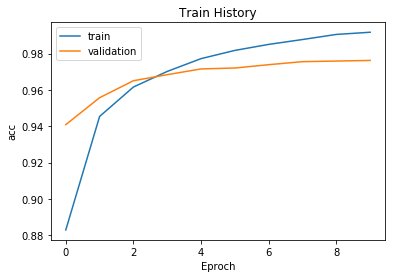

In [12]:
show_train_history(train_history,'acc','val_acc')

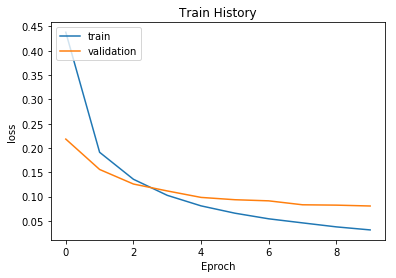

In [13]:
#畫出誤差圖形
show_train_history(train_history,'loss','val_loss')

In [15]:
#評估模型準確率
scores = model.evaluate(x_Test_normalize,y_Test_Onehot)#評估模型準確率用x_Test_normalize(測試資料影像features)y_Test_Onehot(真實影像的值)
print()
print('acuracy=',scores[1])#顯示準確率

 8704/10000 [=========================>....] - ETA: 0s
acuracy= 0.9765


In [16]:
#進行預測
prediction=model.predict_classes(x_Test)

 9152/10000 [==========================>...] - ETA: 0s

In [18]:
prediction

array([7, 2, 1, ..., 4, 5, 6])

In [25]:
import matplotlib.pyplot as plt
def plot_images_labels_prediction(images,labels,predication,idx,num=10):
    fig = plt.gcf()
    fig.set_size_inches(12,14)
    if num>25:num=25
    for i in range(1,num):
        ax=plt.subplot(5,5,i+1)
        ax.imshow(images[idx],cmap='binary')
        title = "label="+str(labels[idx])
        if len(predication)>0:   #如果有傳入預測結果
            title+=',predict='+str(predication[idx])#標題title加入預測結果
        ax.set_title(title,fontsize=10)#設定子圖形的標題title and 大小
        ax.set_xticks([]);ax.set_yticks([])#設定不顯示刻度
        idx+=1
        plt.show()

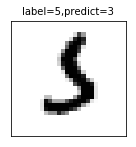

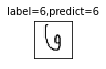

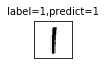

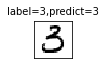

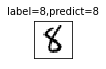

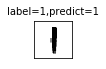

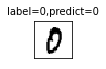

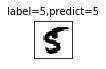

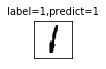

In [28]:
plot_images_labels_prediction(x_test_image,y_test_label,prediction,idx=340)#idx顯示10筆(340~349)

In [29]:
#用pandas建立混淆矩陣(cofusion matrix)
import pandas as pd
pd.crosstab(y_test_label,
            prediction,
            rownames=['label'],
            colnames=['prdection'])

prdection,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,971,0,1,1,1,0,2,1,3,0
1,0,1124,4,0,0,1,2,0,4,0
2,5,0,1009,2,1,0,2,4,8,1
3,0,0,3,995,0,0,0,3,5,4
4,2,0,5,1,960,0,3,0,3,8
5,2,0,0,15,1,854,7,1,9,3
6,5,3,2,1,3,3,940,0,1,0
7,0,5,13,6,1,0,0,988,6,9
8,4,0,3,6,2,1,1,2,954,1


In [32]:
df=pd.DataFrame({'label':y_test_label,'predict':prediction})
df[:2]

,label,predict
0,7,7
1,2,2


In [36]:
df[(df.label==9)&(df.predict==0)]

,label,predict
2648,9,0
4163,9,0
6505,9,0


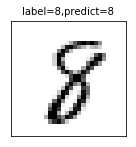

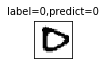

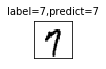

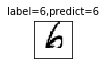

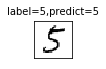

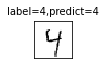

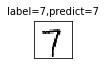

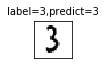

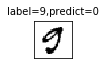

In [38]:
plot_images_labels_prediction(x_test_image,y_test_label,prediction,idx=2640)